## **\[Classification\] 3. SVM**


## **1\. SVM**

* 서포트 벡터 머신(SVM)은 분류 문제에 주로 사용되는 지도 학습 알고리즘
  
* 데이터 포인트를 최적의 초평면(hyperplane)으로 구분하여 분류.

* SVM은 각 클래스와의 거리가 최대가 되는 초평면을 찾는 방식으로 작동하며, 이 초평면에 가장 가까운 데이터 포인트를 서포트 벡터(support vector)라고 부른다.


#### **장점**

-   고차원 데이터에 효과적으로 적용 가능
  
-   비선형 결정 경계를 허용하기 위해 커널 함수를 사용하여 복잡한 경계 형성 가능
  
-   과적합에 강하고 일반화 성능이 뛰어남
  

#### **단점**

-   큰 데이터셋에 대해 학습 속도가 느림
  
-   커널 선택이 모델 성능에 큰 영향을 미침
  
-   하이퍼파라미터 튜닝이 필요함


## **2\. SVM의 작동 원리**

1.  각 클래스의 데이터를 구분할 수 있는 최적의 초평면을 찾음.
   
2.  서포트 벡터를 사용하여 초평면을 정의하고, 각 클래스 사이의 마진(margin)을 최대화함.
   
3.  새로운 데이터 포인트가 주어졌을 때, 해당 포인트가 어느 클래스에 속하는지 판단함.


## **3. SVM의 마진**

#### **1. 하드 마진 SVM (Hard Margin SVM)**

- 하드 마진 SVM은 데이터 포인트가 완전히 분리되어야 하는 경우에 사용.

#### **2. 소프트 마진 SVM (Soft Margin SVM)**

- 소프트 마진 SVM은 일부 데이터 포인트가 결정 경계를 넘어서는 것을 허용

- 데이터에 잡음이나 이상치가 포함되어 있을 때 유용.

-   하드 마진과 소프트 마진이 있는데, 실제 데이터에서는 불완전하거나 노이즈가 섞인 데이터가 들어오기 때문에, 소프트 마진을 자주 사용한다.


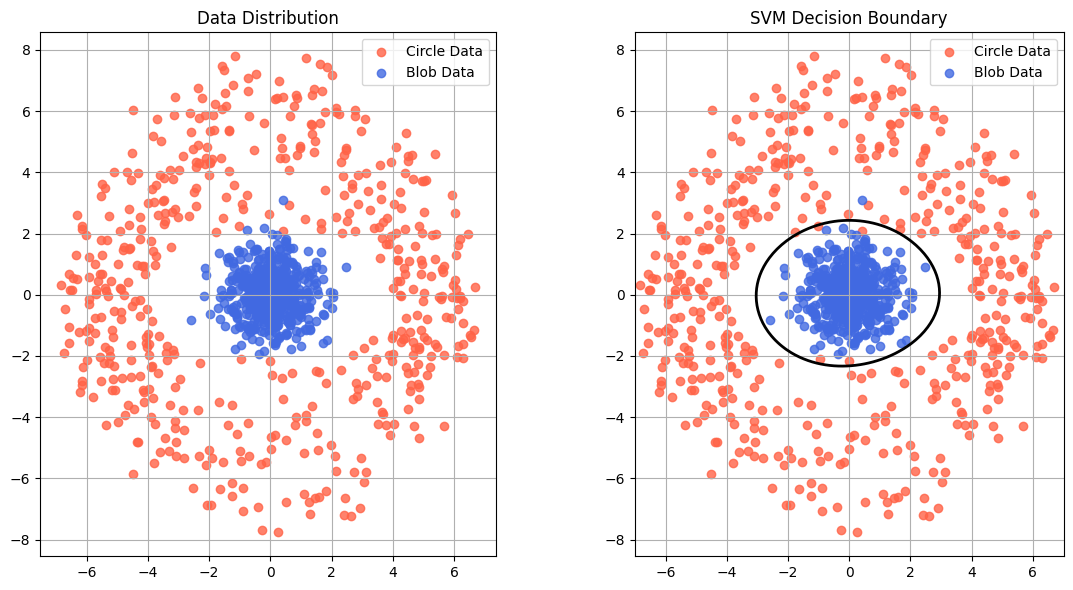

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# step 1: 원 테두리 데이터
theta = np.linspace(0, 2 * np.pi, 500)
r = 5
rand1 = np.random.uniform(-1,2, size=theta.shape)
rand2 = np.random.uniform(-3,3, size=theta.shape)

x_circle = (r+rand1) * np.cos(theta+rand2)
y_circle = (r+rand2) * np.sin(theta+rand2)

# step 2: 덩어리 데이터
n_samples = 500
X_blob, y_blob = make_blobs(n_samples=n_samples, centers=[(0,0)], cluster_std=0.8, random_state=42)

X = np.vstack((np.column_stack((x_circle, y_circle)), X_blob))
y = np.hstack((np.ones(len(x_circle)), np.zeros(len(X_blob))))  # 원은 1, blob은 0

# step 3: SVM 학습 : 비선형 커널 사용
SVM_clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
SVM_clf.fit(X,y)

xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
Z = SVM_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(x_circle, y_circle, color='tomato', alpha=0.8, label='Circle Data')
plt.scatter(X_blob[:, 0], X_blob[:, 1], color='royalblue', alpha=0.8, label='Blob Data')
plt.title("Data Distribution")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x_circle, y_circle, color='tomato', alpha=0.8, label='Circle Data')
plt.scatter(X_blob[:, 0], X_blob[:, 1], color='royalblue', alpha=0.8, label='Blob Data')
plt.contour(xx, yy, Z, colors='black', levels=[0], linewidths=2)
plt.title("SVM Decision Boundary")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()